--- Loading Data ---
Dataset loaded successfully.
First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
0   63    1   3       145   233    1        0       150      0      2.3   
1   37    1   2       130   250    0        1       187      0      3.5   
2   41    0   1       130   204    0        0       172      0      1.4   
3   56    1   1       120   236    0        1       178      0      0.8   
4   57    0   0       120   354    0        1       163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1  


Data split into 1510 training samples and 378 testing samples.

--- Starting Model Training ---
Iteration 0: Cost = 0.6931
Iteration 200: Cost = 0.5026
Iteration 400: Cost = 0.5021
Iteration 600: Cost = 0.5020
Iteration 800: Cost = 0.5020
Iteration 1000: Cost = 0.5020
Iteration 1200: Cost = 0.

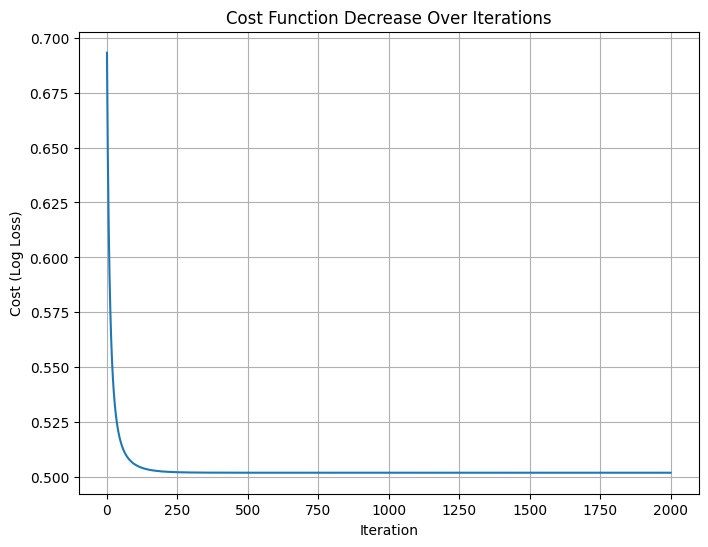

In [ ]:
# 1. Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 2. Logistic Regression Algorithm
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.costs = []

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # Add a small epsilon to prevent log(0)
            epsilon = 1e-15
            y_predicted = np.clip(y_predicted, epsilon, 1 - epsilon)

            cost = (-1 / n_samples) * np.sum(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
            self.costs.append(cost)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            if i % 200 == 0:
                print(f"Iteration {i}: Cost = {cost:.4f}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)


# 3. Load and Prepare the Data
print("--- Loading Data ---")
try:
    df = pd.read_csv('heart.csv')
    print("Dataset loaded successfully.")
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\n")
except FileNotFoundError:
    print("Error: 'heart.csv' not found. Please download it and place it in the same directory.")
    exit()

X = df.drop('target', axis=1).values
y = df['target'].values

# 4. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Data split into {len(X_train)} training samples and {len(X_test)} testing samples.\n")

# 6. Create, Train, and Evaluate the Model
model = LogisticRegressionScratch(learning_rate=0.1, n_iters=2000)

print("--- Starting Model Training ---")
model.fit(X_train, y_train)
print("--- Model Training Complete ---\n")

predictions = model.predict(X_test)

# Custom accuracy calculation
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

acc = accuracy(y_test, predictions)
print(f"--- Model Evaluation ---")
print(f"Accuracy on test set: {acc:.4f} ({acc*100:.2f}%)")

# 7. Plot the Cost Function
plt.figure(figsize=(8, 6))
plt.plot(model.costs)
plt.xlabel("Iteration")
plt.ylabel("Cost (Log Loss)")
plt.title("Cost Function Decrease Over Iterations")
plt.grid(True)